# Problem statement

We have a network of 4 agents that each have an objective function $f_i(x)$. 

The **goal** is to 

$$\begin{array}{rc}\operatorname{minimize} & \sum_{i=1}^m f_i(x) \\ \text { subject to } & x \in \mathbb{R}^n,\end{array} \quad \quad
(1)$$

Each privat objective $f_i$ is defined below

## Objective functions

### Global objective
Represented by eq. 1.

### Private Objectives $f_1, ..., f_4$
Convex quadratic functions of the form: $f_i(x) = x^TP_ix+b_ix+c$

## Assumptions / Opportunities
        
- $\beta$, $\alpha$, $a_{ij}$ = ***fixed*** parameters (arbitrarily) chosen before optimization procedure
    - can we make (some of) them trainable parameters?

- we provide the subgradient in the optimization process 
    ($g_i(t)$ = subgradient of function f_i at point x_i(t))
    - I took the liberty to provide it using ====== method.
        - are there better methods of providing the gradient?

In [5]:
import numpy as np

In [42]:

l = 3*[_]
print(l)
print(type(l[0]))

['', '', '']
<class 'str'>


In [28]:
your_array = np.array([1, 2, 3])

# Number of times to repeat the array
n = 5

# Create the list with separate copies of the array
your_list = [np.copy(your_array) for _ in range(n)]

# Display the result
print(your_list)

[array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3])]


In [9]:
n = 3

# Create the array with n rows of [0]
Df = np.zeros((n, 1), dtype=int)

# Display the result
print('Df array:')
print(Df)

print(len(Df))

print(1e-3)

Df array:
[[0]
 [0]
 [0]]
3
0.001


### Initializing network

In [17]:

class Network():

    def __init__(self, n_agents, x, z):
        # self.initial_x = np.array(         # picking arbitrary initial parameters for the agents's states (replace with random later) (2 parameters for a quadratic function) 
        #                  [ [0],
        #                    [0] ]
        #                    )
                           
        # self.initial_z = np.array(         # picking arbitrary initial auxiliary states z_i for the agents's states (replace with random later) (2 parameters for a quadratic function) 
        #             [ [0],
        #             [0] ]
        #             )
        
        self.fs_private = []      # list of agents's private objective functions
        
        # self.n_agents = len(self.fs_private)

        # self.x = self.n_agents * [np.copy(self.initial_x)]            # list: agents's states
        # self.z = self.n_agents * [np.copy(self.initial_z)]            # list: agents's auxiliary states

        self.n_agents = n_agents    

        self.x = x
        self.z = z 

        self.alpha = 3               # fixed hyperparameters
        self.beta = 0.2
        self.a = 1

    

    


    def f_global(self, x = None, fs_private= None):    # global objective function
        """    
        Returns
        -------
        output: float
            The output of our global objective function for the current state of the agents.
                The project is to make this oujtpus as low as possible.
        
        """

        if x == None:
            x = self.x

        if fs_private == None:
            fs_private = self.fs_private

        private_errors = [ f_i(x_i) for f_i, x_i in zip(fs_private, x) ]

        print("Private Outputs:",  private_errors)

        global_error = sum(private_errors)

        return global_error
    

    def get_subgradientAtPoint(self, f, x, delta= 1e-2):

        """
        Parameters
        -----------
        f: function
            An arbitrary function.
        x: array-like
            An array with the (multi-dimensional) point for which the subgradient of f is desired.
        delta: float
            Represents an infinitesimally small step along an axis.
        
        Returns
        -------
        

        float: value of the subgradient (directional derivative) of f at point x.             
        """

        # Direfctional derivative bit - doesn't work in the 

        # # Computing the directional derivative of f w.r.t. x = (x_1, ..., x_n) 
            
        # Df = len(x) * [0]    # list with the partial deriatives of f w.r.t. x_1, ..., x_n

        # directional_d = 0             # directional derivative

        # for i in range(len(x)):

        #     x_aux = np.copy(x)

        #     print(f"function = {f}, x_aux: at variable {i+1} ", x_aux)
        #     x_aux[i] += delta
        #     print(f"x_aux+ delta at variable {i+1}:", x_aux)

        #     Df[i] = f(x_aux) / delta
        #     print("Df:", Df)
        
        # directional_d = [sum(Df)]

        # return directional_d
    

        # Depricated------------------ -> try putting a "-" in front of g at step 2 of the optimization process


        if type(x[0]) is not float:
            x = [float(x_i) for x_i in x]


        Df = np.zeros((len(x), 1), dtype=int)    # list with the partial deriatives of f w.r.t. x_1, ..., x_n

        for i in range(len(x)):

            x_aux = np.copy(x)

            print(f"function = {f}, x_aux: at variable {i+1} ", x_aux)
            
            x_aux[i] = x[i] + delta
            print(f"function = {f}, x_aux: at variable {i+1} ", x_aux)
            print(f"x_aux+ delta at variable {i+1}:", x_aux)

            Df[i] = (f(x_aux) - f(x)) / delta
            print("Df:", Df)
        
        return Df
        #-------------------------------

        





    def step(self): # in computation stateps, x multiplies and spreads into a single one
        """
        Changes the states of our agents based on a step in the optimization process.

        """

        #------------- first stage -----------------------
        

        # nodes exchanges states x_i and compute auxiliary states z_i.

        for i in range(self.n_agents):
            
            # Test the following in simple env
            self.z[i] = self.z[i] + self.beta*sum( [ self.a*(self.x[i] - self.x[j]) for j in range(self.n_agents) if j!= i ]  )

        
        #------------- second stage --------------------  
        
        # nodes exchange auxiliary states z_i and update states x_i.
        
        for i in range(self.n_agents):
            
            # Test the following in simple env
            self.x[i] = self.x[i] + self.beta*sum( [ self.a*(self.x[j] - self.x[i]) for j in range(self.n_agents) if j!= i ]  ) \
                                    + self.beta*sum( [ self.a*(self.z[j] - self.z[i]) for j in range(self.n_agents) if j!= i ] \
                                        - self.beta * self.alpha * self.get_subgradientAtPoint(self.fs_private[i], self.x[i]) )
            
            
        




In [18]:
N_AGENTS = 4          # the number of agents
N_PARAMS = 2       # the number of parameters of each private objective function

P = np.array(
    [ [[0.2, 0.1],
       [0.1, 0.2]],

      [[0.4, 0.1],
       [0.2, 0.4]],

      [[0.3, 0.1],
       [0.1, 0.2]],


      [[0.5, 0.1],
       [0.1, 0.2]],   
         ]
)

b = np.array(
    [ [[1],
       [8]],

      [[1],
       [1]],

      [[3],
       [1]],

      [[5],
       [1]],   
       ]
)
c = np.linspace(start= 0, stop= 1, num= N_AGENTS)      # c_i are chosen uniformly from [0, 1]



In [19]:

# TODO: set number of agents
n_agents = 4

initial_x = np.array(         # picking arbitrary initial parameters for the agents's states (2 parameters for a quadratic function) 
                 [ [0.],
                   [0.] ]
                   )
                  
initial_z = np.array(         # picking arbitrary initial auxiliary states z_i for the agents's states (2 parameters for a quadratic function) 
            [ [0.],
              [0.] ]
            )


x = n_agents * [np.copy(initial_x)]       # list: agents's states
z = n_agents * [np.copy(initial_z)]       # list: agents's auxiliary states



network = Network(n_agents= n_agents, x= x, z= z)

# add agents's private objectives to network
for i in range(n_agents):
  network.fs_private.append(lambda x: np.squeeze(x.T @ P[i] @ x + b[i].T @ x + c[i]))

print("number of private functions: ", len(network.fs_private))

print(len(network.fs_private))


print(network.n_agents)

print(network.x)



print("output of agent 1: ", network.fs_private[0](network.x[0]))
print("output of agent 2: ", network.fs_private[1](network.x[1]))
print("output of agent 3: ", network.fs_private[2](network.x[2]))
print("output of agent 4: ", network.fs_private[3](network.x[3]))

number of private functions:  4
4
4
[array([[0.],
       [0.]]), array([[0.],
       [0.]]), array([[0.],
       [0.]]), array([[0.],
       [0.]])]
output of agent 1:  1.0
output of agent 2:  1.0
output of agent 3:  1.0
output of agent 4:  1.0


In [20]:
print("Output for global objective", network.f_global())

print("state agent 1: ", network.x[0])
print("private function agent 1: ", network.fs_private[0])

Private Outputs: [array(1.), array(1.), array(1.), array(1.)]
Output for global objective 4.0
state agent 1:  [[0.]
 [0.]]
private function agent 1:  <function <lambda> at 0x7ff9350adea0>


In [21]:
# TODO: pick number of iterations
n_iterations = 100

import matplotlib.pyplot as plt

history_agent1_x1 = []
history_agent1_x2 = []
history_f_global = []

for _ in range(n_iterations):
    history_agent1_x1.append(network.x[0][0])
    history_agent1_x2.append(network.x[0][1])
    history_f_global.append(network.f_global())

    network.step()



history_agent1_x1 = np.squeeze( history_agent1_x1) 
history_agent1_x2 = np.squeeze( history_agent1_x2)
history_f_global = np.squeeze( history_f_global )

plt.plot(range(len(history_f_global)), history_f_global)
plt.title("Output Global Ojective")
plt.show()


plt.title("Parameter updates")
plt.plot(range(len(history_agent1_x1)), history_agent1_x1 )
plt.plot(range(len(history_agent1_x2)), history_agent1_x2 )





Private Outputs: [array(1.), array(1.), array(1.), array(1.)]
function = <function <lambda> at 0x7ff9350adea0>, x_aux: at variable 1  [0. 0.]
function = <function <lambda> at 0x7ff9350adea0>, x_aux: at variable 1  [0.01 0.  ]
x_aux+ delta at variable 1: [0.01 0.  ]


/tmp/ipykernel_5304/874492157.py:107: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = [float(x_i) for x_i in x]


AttributeError: 'list' object has no attribute 'T'

[0]


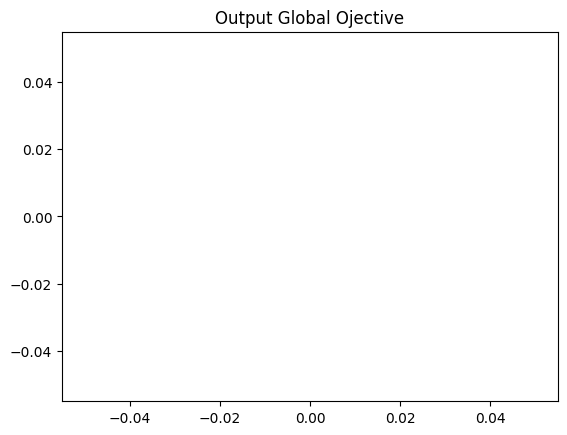

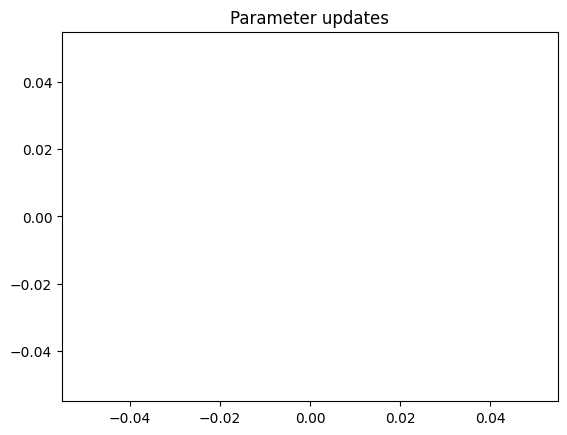

In [10]:
print(history_f_global)

plt.plot(range(len(history_f_global)), history_f_global)
plt.title("Output Global Ojective")
plt.show()


plt.title("Parameter updates")
plt.plot(range(len(history_agent1_x1)), history_agent1_x1 )
plt.plot(range(len(history_agent1_x2)), history_agent1_x2 )



TypeError: float() argument must be a string or a real number, not 'method'

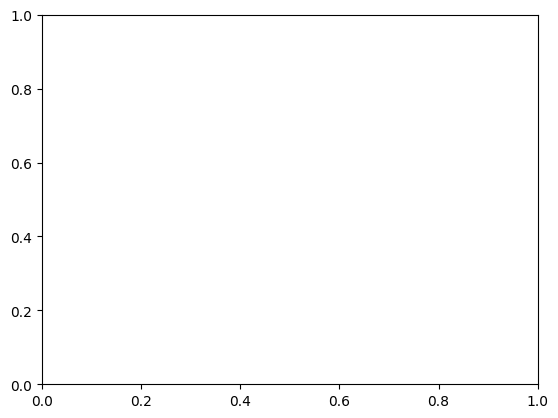

In [99]:
plt.plot(range(len(history_f_global)), history_f_global)
plt.title("Output Global Ojective")
plt.show()


plt.title("Parameter updates")
plt.plot(range(len(history_agent1_x1)), np.squeeze(history_agent1_x1) )
plt.plot(range(len(history_agent1_x2)), np.squeeze(c) )

In [76]:
optimal_state = np.array([[-2.3333],
                          [-4.3333]])


network_optimal = Network()
network_optimal.state = optimal_state

print(network_optimal.state)

for i in range(N_AGENTS):
  network_optimal.fs_private.append(lambda x: np.squeeze(x.T @ P[i] @ x + b[i].T @ x + c[i]))

print("output for Optimal state", network_optimal.f_global())


TypeError: Network.__init__() missing 3 required positional arguments: 'n_agents', 'x', and 'z'

### (ignore for now) Check if the function works for the alleged optimal state (-2.3333, -4.3333) by **computing the gradient** of the global function at that point. It **should be 0**.

In [94]:
import jax
import jax.numpy as jnp

def aux_f_global(state, fs_private= network_optimal.fs_private):    # global objective function

    private_errors = [ f(state) for f in fs_private ]

    global_error = sum(private_errors)

    return global_error
    


derivative = jax.grad(aux_f_global)

print(derivative(optimal_state))

[[ 7.200158 ]
 [-4.7999196]]


In [28]:
print(network_optimal.state)

[[-2.3333]
 [-4.3333]]


# PROBLEM: private functions break at $b_ix$  -> fixed it with $b_i^Tx$ => check with optimal solution if you get 0 for the **first dervative** of the global objective. if yes, move forward

## $b_i^Tx$ didn't fix it for the optimal case, try np.dot(b_i, x)

# Jump over, go with algorithm implementation. If that doesn't converge at the optimal points, get back here